<a href="https://colab.research.google.com/github/lauravazqx/Inferencia-Estadistica/blob/main/Tarea_Semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA SEAMANA 1

## Integrantes:


*   Abundez Tapia Mauricio
*   Ortiz Sanchez Luis Kevin
*   Mora Díaz Brenda Yadira
*   Salgado Grijalva Marco Uriel
*   Salvador Vázquez Laura Teresa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")
%matplotlib inline

## Base Inmuebles

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRAOnSKDj4g1Qdx1NXNnZrJCyUO50dJFO7cOsyt3HqtN3FISPhSNVNNipYNU2I2SfO5nt1OMCfmtfWL/pub?gid=1792337959&single=true&output=csv", encoding="latin-1")

# Convertir Fecha_Venta a formato datetime y extraer el año
df["Fecha_Venta"] = pd.to_datetime(df["Fecha_Venta"], format="%d/%m/%y", errors="coerce")
df["Año_Venta"] = df["Fecha_Venta"].dt.year

df


,TipodeInmueble,Operacion,Provincia,Superficie,Precio_Venta,Fecha_Venta,Vendedor,Satisfaccion,Año_Venta
0,Casa,Alquiler,Girona,168.79,1754463,2004-11-21,Carmen,Muy buena,2004
1,Casa,Alquiler,Tarragona,148.39,1725722,2004-10-08,Luisa,Muy buena,2004
2,Casa,Alquiler,Girona,143.55,1427270,2004-04-21,Luisa,Mala,2004
3,Casa,Alquiler,Barcelona,182.58,1743532,2004-06-16,Joaquï¿½n,Regular,2004
4,Casa,Alquiler,Tarragona,142.47,978358,2004-07-07,Luisa,Mala,2004
...,...,...,...,...,...,...,...,...,...
750,Local,Alquiler,Lleida,95.10,928155,2007-03-15,Joaquï¿½n,Regular,2007
751,Local,Venta,Barcelona,115.99,1202425,2007-03-08,Marï¿½a,Muy buena,2007
752,Local,Alquiler,Tarragona,86.02,725638,2007-04-18,JesÃs,Buena,2007
753,Local,Alquiler,Barcelona,74.45,583172,2007-03-31,Joaquï¿½n,Buena,2007


1.   Clasifique las variables de la base de datos e identifique la escala de medición de cada una de ellas.



In [ ]:
df.dtypes

,0
TipodeInmueble,object
Operacion,object
Provincia,object
Superficie,float64
Precio_Venta,int64
Fecha_Venta,datetime64[ns]
Vendedor,object
Satisfaccion,object
Año_Venta,int32


In [ ]:
df.isna().sum()

,0
TipodeInmueble,0
Operacion,0
Provincia,0
Superficie,0
Precio_Venta,0
Fecha_Venta,0
Vendedor,0
Satisfaccion,0
Año_Venta,0


El tipo de datos que tiene esta base son objetos, flotantes, integer y datetime, tambien no cuenta con nulos

2. Para la variable Superficie, encuentre las medidas de tendencia central y de dispersión así como el percentil 0.76 de los registros correspondientes a ventas del año 2005.

In [ ]:
# Medidas de tendencia central: media, mediana y moda:
# Filtrar los datos del año 2005
df_2005 = df[df["Año_Venta"] == 2005].copy()

# Verificar si hay valores en la variable Superficie
if df_2005["Superficie"].dropna().empty:
    print("No hay datos disponibles en la columna 'Superficie' para el año 2005.")
else:
    # Medidas de tendencia central
    media = df_2005["Superficie"].mean()
    mediana = df_2005["Superficie"].median()
    moda = df_2005["Superficie"].mode().values[0] if not df_2005["Superficie"].mode().empty else "No hay moda"

    # Medidas de dispersión
    desviacion_std = df_2005["Superficie"].std()
    varianza = df_2005["Superficie"].var()
    rango = df_2005["Superficie"].max() - df_2005["Superficie"].min()

    # Percentil 76
    percentil_76 = np.percentile(df_2005["Superficie"].dropna(), 76)

    # Imprimir resultados
    print(f"Medidas de Tendencia Central para 'Superficie' en 2005:")
    print(f"Media: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda}")

    print("\nMedidas de Dispersión:")
    print(f"Desviación estándar: {desviacion_std:.2f}")
    print(f"Varianza: {varianza:.2f}")
    print(f"Rango: {rango:.2f}")

    print(f"\nPercentil 76: {percentil_76:.2f}")


Medidas de Tendencia Central para 'Superficie' en 2005:
Media: 132.61
Mediana: 130.31
Moda: 84.02

Medidas de Dispersión:
Desviación estándar: 38.78
Varianza: 1503.61
Rango: 155.41

Percentil 76: 169.25


In [ ]:
df_2005["Superficie"].describe(percentiles=[0.76])


,Superficie
count,276.000
mean,132.608
std,38.776
min,51.700
50%,130.315
76%,169.250
max,207.110


3. Identifique el año en donde más ingreso (en dinero) entró a la compañía por arquiler.

In [ ]:
alquiler = df[df['Operacion'] != 'Venta'].copy()
alquiler[["Año_Venta", "Precio_Venta"]].groupby("Año_Venta").sum().rename(columns={"Precio_Venta": "Ventas_Totales"})

,Ventas_Totales
Año_Venta,
2004,63914002
2005,178719707
2006,184264446
2007,59845832


Como podemos observar, el año que más ventas por alquiler fue en 2006 con un total de $184,264,446.

4. Para la variable Precio-Venta, elabore un boxplot por año (4 gráficas en total), compare y comente.

In [ ]:
print(df[["Año_Venta", "Precio_Venta"]].groupby("Año_Venta").count())


           Precio_Venta
Año_Venta              
2004                100
2005                276
2006                284
2007                 95


Año 2004: 100 registros
Año 2005: 276 registros
Año 2006: 284 registros
Año 2007: 95 registros


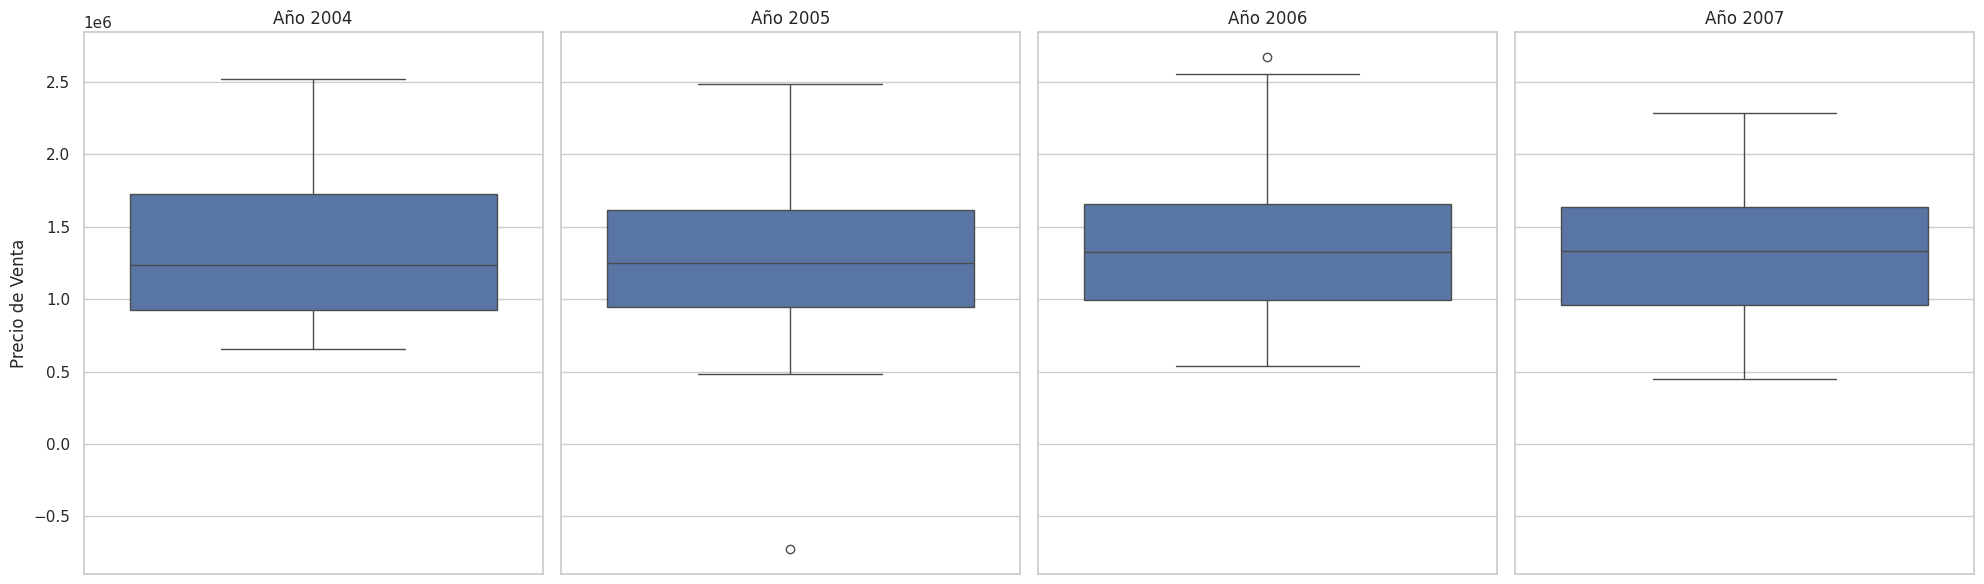

In [ ]:
sns.set(style="whitegrid")

# Crear la figura con 4 subgráficos
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Años disponibles
años_disponibles = [2004, 2005, 2006, 2007]

for i, año in enumerate(años_disponibles):
    data_año = df[df["Año_Venta"] == año]["Precio_Venta"].dropna()

    print(f"Año {año}: {len(data_año)} registros")

    if not data_año.empty:
        sns.boxplot(y=data_año, ax=axes[i])
        axes[i].set_title(f"Año {año}")
        axes[i].set_ylabel("Precio de Venta")
    else:
        axes[i].set_title(f"Año {año} (Sin datos)")

plt.tight_layout()
plt.show()





Comparación:

* Mediana: (línea dentro de la caja) aumenta ligeramente conforme los años.
En 2004, la mediana es más baja en comparación con los otros años.

En 2005, la mediana sube un poco.

En 2006 y 2007, se mantiene en niveles similares a 2005.

Esto sugiere un aumento moderado en los precios de venta con el tiempo.

* Dispersión y rango: en general las cajas son similares en los 4 años.

En 2004 vemos mas variabilidad mientras que de 2005 a 2007 vemos dispersión uniforme.



5. Calcule el coeficiente de correlación entre las variables Superficie y Precio-Venta en cada tipo de operación (Venta, Alquiler), ¿dirá que existe una correlación importante entre estas dos variables?

In [ ]:
# Filtrar los datos para "Venta" y "Alquiler"
df_venta = df[df['Operacion'] == 'Venta']
df_alquiler = df[df['Operacion'] == 'Alquiler']

# Calcular la correlación de Pearson para "Venta"
correlacion_venta = df_venta['Superficie'].corr(df_venta['Precio_Venta'])

# Calcular la correlación de Pearson para "Alquiler"
correlacion_alquiler = df_alquiler['Superficie'].corr(df_alquiler['Precio_Venta'])

# Imprimir los resultados
print(f"Coeficiente de correlación para 'Venta': {correlacion_venta}")
print(f"Coeficiente de correlación para 'Alquiler': {correlacion_alquiler}")

Coeficiente de correlación para 'Venta': 0.8584991929307706
Coeficiente de correlación para 'Alquiler': 0.8338899232347955


Correlación en Venta: El coeficiente de 0.8585 indica una correlación positiva fuerte entre la superficie y el precio de venta. Esto significa que, en general, a medida que la superficie de los inmuebles aumenta, también lo hace su precio de venta. Los inmuebles más grandes tienden a tener precios más altos.

Correlación en Alquiler: El coeficiente de 0.8339 también muestra una correlación positiva fuerte, aunque ligeramente inferior a la de venta. Esto sugiere que, en el caso del alquiler, también existe una relación positiva entre la superficie y el precio de alquiler. Los inmuebles más grandes tienden a tener precios de alquiler más altos.

Conclusión:
Sí existe una correlación importante entre superficie y precio tanto en venta como en alquiler, ya que en ambos casos los coeficientes son bastante altos, cercanos a 0.85, lo que indica una fuerte relación positiva entre ambas variables.

## Base Futbol


In [ ]:
raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSVlEvs6c8KIO7y4xv8OIHyj8eOw_HMhqsYS2MlNle3HgHTqDBJNhwi0KkAJAwy-OxB-wqwc9YSfdcA/pub?gid=1333014360&single=true&output=csv"
, encoding="latin")

raw_data


,Any,Jornada,Partit ID,Data,Local,GL,GV,Visitant
0,1,1,1001,03/09/83,R.C.D. Espanyol,1,4,At. de Madrid
1,1,1,1002,03/09/83,Real S. de GijÃ³n,1,1,Valencia C.F.
2,1,1,1003,03/09/83,Real Murcia C.F.,3,1,Real Sociedad
3,1,1,1004,04/09/83,R.C.D. Mallorca,1,1,R. Zaragoza C.D.
4,1,1,1005,04/09/83,C.At. de Osasuna,0,0,U.D. Salamanca
...,...,...,...,...,...,...,...,...
8693,23,38,23376,13/05/06,R.C.D. Mallorca,3,1,R. Zaragoza C.D.
8694,23,38,23377,13/05/06,Villarreal C.F.,2,0,Real Racing Club
8695,23,38,23378,16/05/06,C.At. de Osasuna,2,1,Valencia C.F.
8696,23,38,23379,16/05/06,Sevilla F.C.,4,3,Real Madrid C.F.


1. Clasifique las variables de la base de datos e identifique la escala de medición de cada una de ellas.

In [ ]:
raw_data.dtypes

,0
Any,int64
Jornada,int64
Partit ID,int64
Data,object
Local,object
GL,int64
GV,int64
Visitant,object


2.Genere la variable número total de goles en cada partido y para esta variable encuentre las medidas de tendencia central y de dispersion así como el percentil 0.95. Lleve a cabo un histograma de esta variable asi como una borplot y comente.

In [ ]:
# Variable "total_goles" sumando los goles de ambos equipos
raw_data['total_goles'] = raw_data['GL'] + raw_data['GV']

# Ver las primeras filas
print(raw_data[['GL', 'GV', 'total_goles']].head())

   GL  GV  total_goles
0   1   4            5
1   1   1            2
2   3   1            4
3   1   1            2
4   0   0            0


In [ ]:
raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSVlEvs6c8KIO7y4xv8OIHyj8eOw_HMhqsYS2MlNle3HgHTqDBJNhwi0KkAJAwy-OxB-wqwc9YSfdcA/pub?gid=1333014360&single=true&output=csv"
, encoding="latin")

raw_data

,Any,Jornada,Partit ID,Data,Local,GL,GV,Visitant
0,1,1,1001,03/09/83,R.C.D. Espanyol,1,4,At. de Madrid
1,1,1,1002,03/09/83,Real S. de GijÃ³n,1,1,Valencia C.F.
2,1,1,1003,03/09/83,Real Murcia C.F.,3,1,Real Sociedad
3,1,1,1004,04/09/83,R.C.D. Mallorca,1,1,R. Zaragoza C.D.
4,1,1,1005,04/09/83,C.At. de Osasuna,0,0,U.D. Salamanca
...,...,...,...,...,...,...,...,...
8693,23,38,23376,13/05/06,R.C.D. Mallorca,3,1,R. Zaragoza C.D.
8694,23,38,23377,13/05/06,Villarreal C.F.,2,0,Real Racing Club
8695,23,38,23378,16/05/06,C.At. de Osasuna,2,1,Valencia C.F.
8696,23,38,23379,16/05/06,Sevilla F.C.,4,3,Real Madrid C.F.


In [ ]:
import pandas as pd

# Leer el archivo CSV desde el enlace de Google Sheets
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSVlEvs6c8KIO7y4xv8OIHyj8eOw_HMhqsYS2MlNle3HgHTqDBJNhwi0KkAJAwy-OxB-wqwc9YSfdcA/pub?gid=1333014360&single=true&output=csv"
raw_data = pd.read_csv(url, encoding="latin-1")

# Verificar las primeras filas del DataFrame para comprender su estructura
raw_data.head()


,Any,Jornada,Partit ID,Data,Local,GL,GV,Visitant
0,1,1,1001,03/09/83,R.C.D. Espanyol,1,4,At. de Madrid
1,1,1,1002,03/09/83,Real S. de GijÃ³n,1,1,Valencia C.F.
2,1,1,1003,03/09/83,Real Murcia C.F.,3,1,Real Sociedad
3,1,1,1004,04/09/83,R.C.D. Mallorca,1,1,R. Zaragoza C.D.
4,1,1,1005,04/09/83,C.At. de Osasuna,0,0,U.D. Salamanca


Media de total de goles: 2.5369050356403773
Mediana de total de goles: 2.0
Desviación estándar de total de goles: 1.6561582072096646
Percentil 0.95 de total de goles: 6.0


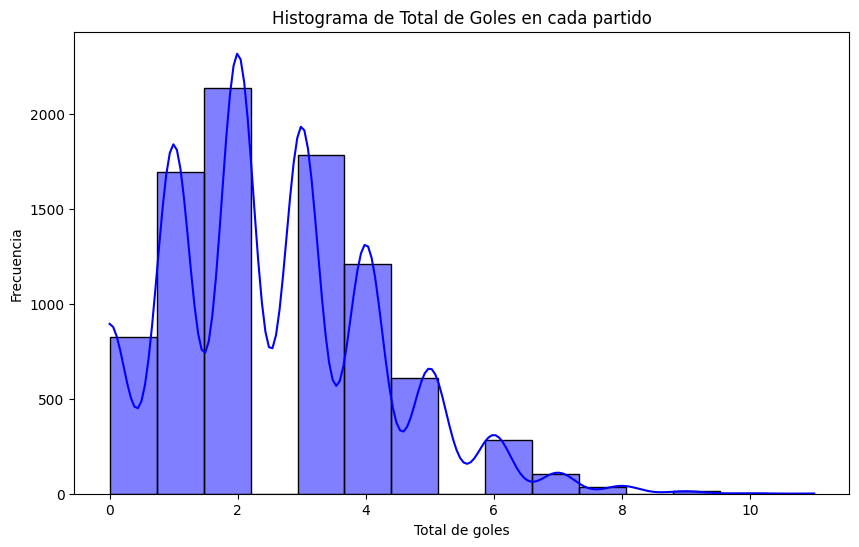

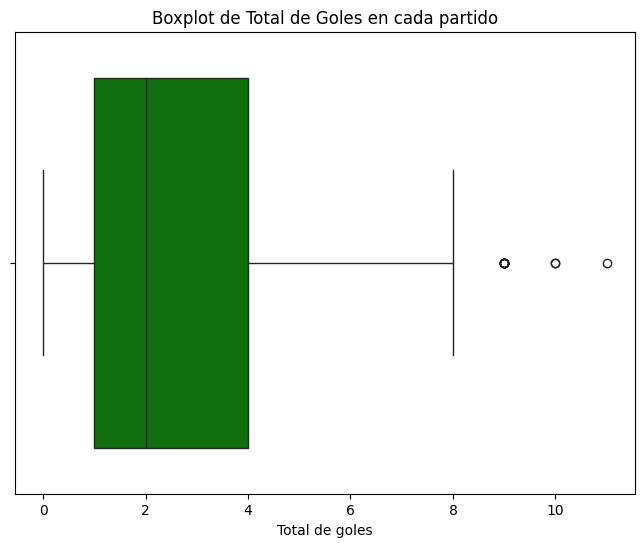

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la variable 'total_goles' sumando goles del equipo local (GL) y goles del equipo visitante (GV)
raw_data['total_goles'] = raw_data['GL'] + raw_data['GV']

# Calculamos las medidas de tendencia central y dispersión
media = raw_data['total_goles'].mean()
mediana = raw_data['total_goles'].median()
desviacion_estandar = raw_data['total_goles'].std()
percentil_95 = np.percentile(raw_data['total_goles'], 95)

# Imprimimos los resultados
print(f"Media de total de goles: {media}")
print(f"Mediana de total de goles: {mediana}")
print(f"Desviación estándar de total de goles: {desviacion_estandar}")
print(f"Percentil 0.95 de total de goles: {percentil_95}")

# Histograma de la variable 'total_goles'
plt.figure(figsize=(10,6))
sns.histplot(raw_data['total_goles'], bins=15, kde=True, color='blue')
plt.title('Histograma de Total de Goles en cada partido')
plt.xlabel('Total de goles')
plt.ylabel('Frecuencia')
plt.show()

# Generamos boxplot de la variable 'total_goles'
plt.figure(figsize=(8,6))
sns.boxplot(x=raw_data['total_goles'], color='green')
plt.title('Boxplot de Total de Goles en cada partido')
plt.xlabel('Total de goles')
plt.show()


1. Media de total de goles: 2.54

La media de los goles totales por partido es aproximadamente 2.54. Esto indica que en promedio, en cada partido se marcan un poco más de 2 goles.
2. Mediana de total de goles: 2.0

La mediana es 2, lo que significa que la mitad de los partidos tienen 2 goles o menos. Esto confirma que la mayoría de los partidos tienden a ser de baja puntuación (con 2 goles o menos), y el valor de la media ligeramente superior a la mediana (2.54 frente a 2) indica que hay algunos partidos con más goles que están elevando la media.
3. Desviación estándar de total de goles: 1.66

La desviación estándar es 1.66, lo que indica una dispersión moderada de los goles. Es decir, la cantidad de goles por partido no está demasiado concentrada en torno a la media, y hay una variabilidad significativa en la cantidad de goles entre los diferentes partidos. Esto sugiere que algunos partidos tienen pocos goles (1 o 2), mientras que otros pueden tener más goles (más de 3), pero no en exceso.
4. Percentil 0.95 de total de goles: 6.0

El percentil 0.95 de 6.0 significa que el 95% de los partidos tienen 6 goles o menos. Esto sugiere que, si bien la mayoría de los partidos tienen pocos goles (con una media de 2.54), hay algunos partidos con un número significativamente mayor de goles, pero estos son relativamente raros. Los partidos con 6 o más goles son poco comunes, ya que solo el 5% de los partidos tienen una cantidad de goles mayor a 6.

3. Por cada año, identifique el equipo que mas goles anotó y el equipo que mas goles recibió.

In [ ]:
goles_anotados_l=raw_data.groupby(["Any", "Local"])["GL"].sum().reset_index()
goles_anotados_v=raw_data.groupby(["Any","Visitant"])["GV"].sum().reset_index()
goles_anotados_l.columns = ["Any", "Equipo", "goles_anotados"]
goles_anotados_v.columns = ["Any", "Equipo", "goles_anotados"]
goles_anotados = pd.concat([goles_anotados_l, goles_anotados_v], ignore_index=True)
goles_anotados=goles_anotados.groupby(["Any","Equipo"])["goles_anotados"].sum().reset_index()
goles_anotados
mas_goles_a=goles_anotados.loc[goles_anotados.groupby("Any")["goles_anotados"].idxmax()]

In [ ]:
mas_goles_a


,Any,Equipo,goles_anotados
5,1,F.C. Barcelona,62
23,2,F.C. Barcelona,69
47,3,Real Madrid C.F.,83
65,4,Real Madrid C.F.,84
85,5,Real Madrid C.F.,95
105,6,Real Madrid C.F.,91
126,7,Real Madrid C.F.,107
139,8,F.C. Barcelona,74
159,9,F.C. Barcelona,87
179,10,F.C. Barcelona,87


In [ ]:
goles_recibidos_l=raw_data.groupby(["Any","Local"])["GV"].sum().reset_index()
goles_recibidos_v=raw_data.groupby(["Any","Visitant"])["GL"].sum().reset_index()
goles_recibidos_l.columns = ["Any", "Equipo", "Goles_Recibidos"]
goles_recibidos_v.columns = ["Any", "Equipo", "Goles_Recibidos"]
goles_recibidos = pd.concat([goles_recibidos_l, goles_recibidos_v], ignore_index=True)
goles_recibidos = goles_recibidos.groupby(["Any", "Equipo"])["Goles_Recibidos"].sum().reset_index()
goles_recibidos
mas_goles_r = goles_recibidos.loc[goles_recibidos.groupby("Any")["Goles_Recibidos"].idxmax()]

In [ ]:
mas_goles_r


,Any,Equipo,Goles_Recibidos
6,1,R. Valladolid D.,60
30,2,Real Murcia C.F.,52
44,3,R.C. Celta de V.,72
71,4,U.D. Las Palmas,67
90,5,U.D. Las Palmas,65
98,6,Elche C.F.,71
125,7,Rayo Vallecano,75
144,8,Real Betis B. S.,65
163,9,R.C.D. Espanyol,60
178,10,CÃ¡diz C.F.,70


4. Lleve a cabo una *boxplot* del número total de goles en cada partido por año y comparelas, comente si cree que exista un año donde el promedio de goles por partido tiende a ser diferente.

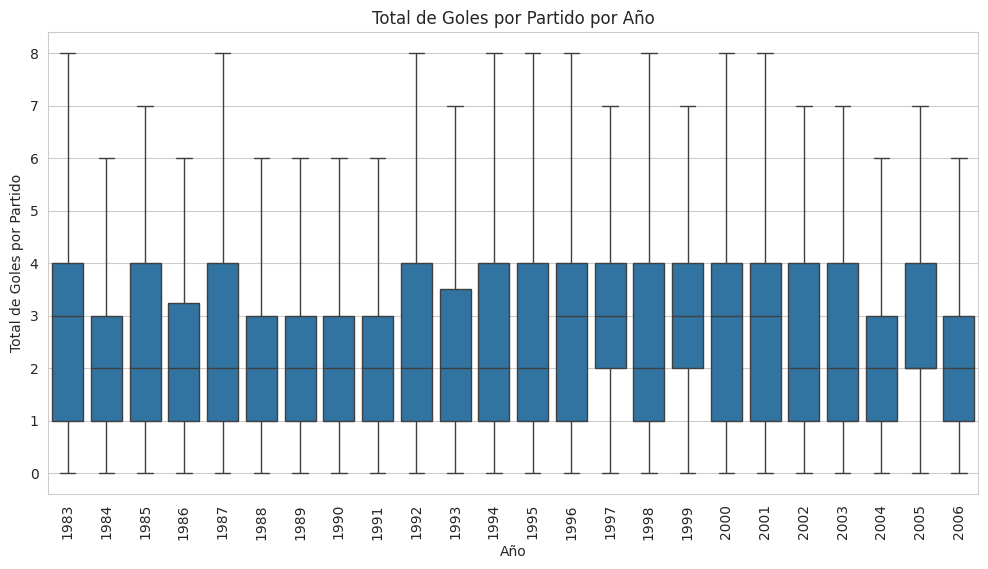

In [ ]:
# Sumar goles por partido
raw_data["Total_Goles"] = raw_data["GL"] + raw_data["GV"]

# Extraer solo el año de la columna Data
raw_data["Data"] = pd.to_datetime(raw_data["Data"], format="%d/%m/%y", dayfirst=True)
raw_data["Año"] = raw_data["Data"].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x="Año", y="Total_Goles", data=raw_data, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel("Año")
plt.ylabel("Total de Goles por Partido")
plt.title("Total de Goles por Partido por Año")

plt.show()

Comparación:

*   Promedio: En general el promedio se matiene entre 2 y 3 goles por partido

*   Hay una variabilidad en algunos años
*   El primer cuartil se mantiene en casi todo los años

En el año 2005 el primer y segundo cuartil es el mismo, esto quiere decir que no hay tanta variacion en los datos


5. Calcule el coeficiente de correlación entre las variables GL (Goles del local) y GV
(Goles del Visitante) y comente

In [ ]:
correlacion = raw_data[['GL', 'GV']].corr()
correlacion
if correlacion.iloc[0,1] > 0.5:
    print("\nExiste una correlación positiva moderada/alta entre los goles del local y visitante.")
elif correlacion.iloc[0,1] < -0.5:
    print("\nExiste una correlación negativa moderada/alta entre los goles del local y visitante.")
else:
    print("\nNo hay una correlación significativa entre los goles del local y visitante.")


No hay una correlación significativa entre los goles del local y visitante.
